In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.DataFrame(pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'))
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.00,0,15.550,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.00,0,15.550,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.00,0,15.550,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.00,0,15.550,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.00,0,20.840,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.00,0,21.460,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.00,0,20.710,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.00,0,19.680,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.00,0,19.500,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.00,0,19.950,21.97


In [4]:
y = df[['Heating Load', 'Cooling Load']]
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor as gb

In [6]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [7]:
df1 = pd.DataFrame()
rf = RandomForestRegressor(n_estimators=500)
df1['Features'] = df.columns[:8]


for i in range(1000):

    rf.fit(X,y)
    rf_imp = rf.feature_importances_
    
    run_col_name = 'Run ' + str(i)
    df1[run_col_name] = rf_imp

    

df1['Average'] = df1.mean(axis = 1, numeric_only = True)
df1 = df1.sort_values(by = 'Average', ascending = False, ignore_index=True)
df1


Features     Run 0     Run 1     Run 2     Run 3  \
0       Relative Compactness  0.256092  0.264946  0.237450  0.279221   
1               Surface Area  0.260186  0.242454  0.234260  0.229733   
2             Overall Height  0.189961  0.189521  0.209083  0.191485   
3                  Roof Area  0.164940  0.174498  0.190433  0.171461   
4               Glazing Area  0.062814  0.063183  0.062984  0.062858   
5                  Wall Area  0.044998  0.044661  0.045126  0.044510   
6  Glazing Area Distribution  0.014345  0.014113  0.013954  0.013974   
7                Orientation  0.006664  0.006623  0.006709  0.006757   

      Run 4     Run 5     Run 6     Run 7     Run 8     Run 9    Run 10  \
0  0.283536  0.254241  0.258605  0.259278  0.274881  0.247579  0.253312   
1  0.243504  0.246201  0.231583  0.214900  0.247268  0.256032  0.279909   
2  0.186510  0.225339  0.196102  0.181563  0.179752  0.196297  0.188279   
3  0.160025  0.143925  0.183811  0.217375  0.166534  0.174207  0.150702   
4  0.062861  0.063055  0.062601  0.062768  0.063528  0.063214  0.063496   
5  0.042509  0.046633  0.045830  0.043262  0.047090  0.041981  0.043736   
6  0.014348  0.013951  0.014733  0.014147  0.014332  0.013995  0.013870   
7  0.006706  0.006657  0.006735  0.006708  0.006615  0.006696  0.006696   

     Run 11    Run 12    Run 13    Run 14    Run 15    Run 16    Run 17  \
0  0.253364  0.255686  0.271533  0.267177  0.259745  0.256945  0.254035   
1  0.238257  0.252198  0.258229  0.244749  0.232134  0.259233  0.244092   
2  0.215358  0.212153  0.208947  0.185114  0.189967  0.196599  0.196214   
3  0.166410  0.153709  0.134375  0.175783  0.192304  0.161311  0.174267   
4  0.063226  0.062912  0.062895  0.062894  0.062642  0.062978  0.062827   
5  0.042835  0.042395  0.042922  0.043552  0.042325  0.041941  0.047566   
6  0.013908  0.014306  0.014397  0.014102  0.014250  0.014340  0.014341   
7  0.006642  0.006640  0.006701  0.006629  0.006633  0.006652  0.006657   

     Run 18    Run 19    Run 20    Run 21    Run 22    Run 23    Run 24  \
0  0.245185  0.258073  0.235667  0.263311  0.240690  0.245804  0.286309   
1  0.257336  0.264087  0.262541  0.262569  0.262059  0.237588  0.240884   
2  0.185292  0.174103  0.196544  0.194435  0.192940  0.213558  0.184749   
3  0.186104  0.175770  0.175923  0.151571  0.175906  0.174346  0.160258   
4  0.062922  0.062899  0.063028  0.063177  0.063522  0.062806  0.062706   
5  0.042504  0.044235  0.045321  0.044274  0.044226  0.044604  0.043548   
6  0.014040  0.014119  0.014345  0.014008  0.014050  0.014617  0.014884   
7  0.006617  0.006714  0.006631  0.006655  0.006608  0.006677  0.006662   

     Run 25    Run 26    Run 27    Run 28    Run 29    Run 30    Run 31  \
0  0.295118  0.259505  0.265264  0.278192  0.265835  0.249625  0.232823   
1  0.238714  0.239809  0.245103  0.241161  0.242307  0.221044  0.267571   
2  0.175474  0.187928  0.191529  0.188349  0.200904  0.230771  0.223161   
3  0.164790  0.182304  0.172386  0.165335  0.161855  0.171130  0.146032   
4  0.063244  0.063321  0.062854  0.063099  0.063269  0.063100  0.062745   
5  0.041862  0.046418  0.042065  0.043010  0.044924  0.043367  0.046839   
6  0.014213  0.014035  0.014130  0.014192  0.014317  0.014223  0.014170   
7  0.006586  0.006681  0.006668  0.006663  0.006590  0.006741  0.006659   

     Run 32    Run 33    Run 34    Run 35    Run 36    Run 37    Run 38  \
0  0.233102  0.269057  0.235058  0.245646  0.273729  0.253908  0.245247   
1  0.231991  0.246715  0.266851  0.244715  0.229604  0.247815  0.207497   
2  0.229393  0.186924  0.204406  0.221723  0.185093  0.210799  0.226403   
3  0.179751  0.167746  0.169448  0.158537  0.187146  0.157231  0.194954   
4  0.062523  0.063136  0.062859  0.062733  0.062603  0.063450  0.062957   
5  0.042372  0.045711  0.040783  0.045828  0.041023  0.045947  0.042132   
6  0.014185  0.014043  0.013999  0.014129  0.014162  0.014198  0.014173   
7  0.006684  0.006669  0.006596  0.006689  0.006641  0.006652  0.00

In [8]:
df2 = pd.DataFrame()
ada = AdaBoostRegressor(n_estimators=500)
df2['Features'] = df.columns[:8]

df3 = df2

for i in range(1000):

    ada.fit(X,y['Heating Load'])
    ada_imp = ada.feature_importances_
    
    run_col_name = 'Run ' + str(i)
    df2[run_col_name] = ada_imp
    
    
    ada.fit(X,y['Cooling Load'])
    ada_imp = ada.feature_importances_
    
    df3[run_col_name] = ada_imp

df2['Average'] = df2.mean(axis = 1, numeric_only = True)
df2 = df2.sort_values(by = 'Average', ascending = False, ignore_index=True)
df2

Features     Run 0     Run 1     Run 2         Run 3  \
0       Relative Compactness  0.371141  0.235094  0.109339  2.348672e-01   
1               Surface Area  0.323607  0.188065  0.476537  1.667509e-01   
2             Overall Height  0.091643  0.132303  0.167766  9.306731e-02   
3                  Roof Area  0.041187  0.294067  0.077010  1.453156e-01   
4               Glazing Area  0.099754  0.106721  0.082874  1.549750e-01   
5                  Wall Area  0.056670  0.019822  0.064487  1.789994e-01   
6  Glazing Area Distribution  0.015974  0.023926  0.021987  2.602431e-02   
7                Orientation  0.000024  0.000002  0.000000  3.532136e-07   

      Run 4     Run 5     Run 6     Run 7     Run 8     Run 9    Run 10  \
0  0.444100  0.437040  0.146761  0.161160  0.146733  0.359138  0.303619   
1  0.181610  0.147446  0.286335  0.381510  0.336751  0.164663  0.229864   
2  0.107307  0.170094  0.115881  0.273439  0.249452  0.274539  0.125539   
3  0.135267  0.072536  0.130659  0.074346  0.121407  0.017354  0.135159   
4  0.076327  0.097703  0.147156  0.073109  0.083983  0.102928  0.096940   
5  0.035975  0.067039  0.102722  0.015134  0.038189  0.070112  0.081725   
6  0.019414  0.008142  0.055747  0.021302  0.023485  0.011261  0.027154   
7  0.000000  0.000000  0.014739  0.000000  0.000000  0.000006  0.000000   

     Run 11    Run 12    Run 13    Run 14    Run 15    Run 16    Run 17  \
0  0.203302  0.333162  0.327437  0.299675  0.380027  0.180220  0.223902   
1  0.319383  0.188329  0.180529  0.326705  0.223316  0.227200  0.211623   
2  0.172667  0.139986  0.064083  0.225503  0.085450  0.188390  0.236859   
3  0.171786  0.220904  0.065229  0.000000  0.074165  0.271979  0.180478   
4  0.093443  0.096769  0.154752  0.103292  0.128135  0.092204  0.080741   
5  0.032208  0.008022  0.156999  0.030542  0.087235  0.024451  0.034718   
6  0.007211  0.012817  0.050946  0.014281  0.021620  0.015556  0.031667   
7  0.000000  0.000012  0.000024  0.000001  0.000052  0.000000  0.000012   

     Run 18    Run 19    Run 20    Run 21    Run 22    Run 23    Run 24  \
0  0.299486  0.398411  0.331673  0.302353  0.276522  0.310480  0.191422   
1  0.230101  0.254515  0.126936  0.191079  0.254468  0.132537  0.271068   
2  0.151299  0.032800  0.159998  0.124491  0.216146  0.082031  0.286725   
3  0.133913  0.184871  0.087383  0.060901  0.063756  0.080926  0.117379   
4  0.108830  0.085678  0.157225  0.156463  0.120827  0.131484  0.093029   
5  0.044512  0.030689  0.118229  0.147621  0.050519  0.214756  0.028461   
6  0.031858  0.013036  0.018556  0.017091  0.017730  0.046674  0.011911   
7  0.000000  0.000000  0.000000  0.000001  0.000031  0.001112  0.000005   

     Run 25        Run 26    Run 27    Run 28    Run 29    Run 30    Run 31  \
0  0.266187  2.549571e-01  0.422402  0.209551  0.205341  0.241247  0.306123   
1  0.222798  2.240825e-01  0.297334  0.223966  0.202409  0.157523  0.320016   
2  0.129508  2.173662e-01  0.073280  0.160203  0.186591  0.095105  0.171477   
3  0.141264  1.735244e-01  0.032230  0.107465  0.160400  0.125689  0.056756   
4  0.149904  8.173776e-02  0.104061  0.159250  0.140822  0.146017  0.087720   
5  0.078385  2.380639e-02  0.048329  0.104810  0.077848  0.180719  0.036152   
6  0.011937  2.452477e-02  0.022345  0.034755  0.026588  0.053491  0.021749   
7  0.000018  8.701934e-07  0.000019  0.000000  0.000000  0.000209  0.000007   

     Run 32    Run 33    Run 34    Run 35    Run 36    Run 37    Run 38  \
0  0.273315  0.359848  0.313199  0.161151  0.209446  0.410924  0.395666   
1  0.339074  0.164176  0.242245  0.331254  0.178643  0.252829  0.189002   
2  0.187552  0.126278  0.156083  0.040488  0.108215  0.161415  0.264344   
3  0.064129  0.187849  0.159293  0.303815  0.346374  0.039331  0.006513   
4  0.089411  0.101457  0.079191  0.103292  0.092682  0.089343  0.096348   
5  0.026808  0.043098  0.019576  0.055389  0.052829  0.021075  0.027206   
6  0.019710  0.017295  0.030409  0.004612  0.011811  0.025080  0.02092

In [9]:
df3['Average'] = df3.mean(axis = 1, numeric_only = True)
df3 = df3.sort_values(by = 'Average', ascending = False, ignore_index=True)
df3

Features     Run 0     Run 1     Run 2         Run 3  \
0       Relative Compactness  0.371141  0.235094  0.109339  2.348672e-01   
1               Surface Area  0.323607  0.188065  0.476537  1.667509e-01   
2             Overall Height  0.091643  0.132303  0.167766  9.306731e-02   
3                  Roof Area  0.041187  0.294067  0.077010  1.453156e-01   
4               Glazing Area  0.099754  0.106721  0.082874  1.549750e-01   
5                  Wall Area  0.056670  0.019822  0.064487  1.789994e-01   
6  Glazing Area Distribution  0.015974  0.023926  0.021987  2.602431e-02   
7                Orientation  0.000024  0.000002  0.000000  3.532136e-07   

      Run 4     Run 5     Run 6     Run 7     Run 8     Run 9    Run 10  \
0  0.444100  0.437040  0.146761  0.161160  0.146733  0.359138  0.303619   
1  0.181610  0.147446  0.286335  0.381510  0.336751  0.164663  0.229864   
2  0.107307  0.170094  0.115881  0.273439  0.249452  0.274539  0.125539   
3  0.135267  0.072536  0.130659  0.074346  0.121407  0.017354  0.135159   
4  0.076327  0.097703  0.147156  0.073109  0.083983  0.102928  0.096940   
5  0.035975  0.067039  0.102722  0.015134  0.038189  0.070112  0.081725   
6  0.019414  0.008142  0.055747  0.021302  0.023485  0.011261  0.027154   
7  0.000000  0.000000  0.014739  0.000000  0.000000  0.000006  0.000000   

     Run 11    Run 12    Run 13    Run 14    Run 15    Run 16    Run 17  \
0  0.203302  0.333162  0.327437  0.299675  0.380027  0.180220  0.223902   
1  0.319383  0.188329  0.180529  0.326705  0.223316  0.227200  0.211623   
2  0.172667  0.139986  0.064083  0.225503  0.085450  0.188390  0.236859   
3  0.171786  0.220904  0.065229  0.000000  0.074165  0.271979  0.180478   
4  0.093443  0.096769  0.154752  0.103292  0.128135  0.092204  0.080741   
5  0.032208  0.008022  0.156999  0.030542  0.087235  0.024451  0.034718   
6  0.007211  0.012817  0.050946  0.014281  0.021620  0.015556  0.031667   
7  0.000000  0.000012  0.000024  0.000001  0.000052  0.000000  0.000012   

     Run 18    Run 19    Run 20    Run 21    Run 22    Run 23    Run 24  \
0  0.299486  0.398411  0.331673  0.302353  0.276522  0.310480  0.191422   
1  0.230101  0.254515  0.126936  0.191079  0.254468  0.132537  0.271068   
2  0.151299  0.032800  0.159998  0.124491  0.216146  0.082031  0.286725   
3  0.133913  0.184871  0.087383  0.060901  0.063756  0.080926  0.117379   
4  0.108830  0.085678  0.157225  0.156463  0.120827  0.131484  0.093029   
5  0.044512  0.030689  0.118229  0.147621  0.050519  0.214756  0.028461   
6  0.031858  0.013036  0.018556  0.017091  0.017730  0.046674  0.011911   
7  0.000000  0.000000  0.000000  0.000001  0.000031  0.001112  0.000005   

     Run 25        Run 26    Run 27    Run 28    Run 29    Run 30    Run 31  \
0  0.266187  2.549571e-01  0.422402  0.209551  0.205341  0.241247  0.306123   
1  0.222798  2.240825e-01  0.297334  0.223966  0.202409  0.157523  0.320016   
2  0.129508  2.173662e-01  0.073280  0.160203  0.186591  0.095105  0.171477   
3  0.141264  1.735244e-01  0.032230  0.107465  0.160400  0.125689  0.056756   
4  0.149904  8.173776e-02  0.104061  0.159250  0.140822  0.146017  0.087720   
5  0.078385  2.380639e-02  0.048329  0.104810  0.077848  0.180719  0.036152   
6  0.011937  2.452477e-02  0.022345  0.034755  0.026588  0.053491  0.021749   
7  0.000018  8.701934e-07  0.000019  0.000000  0.000000  0.000209  0.000007   

     Run 32    Run 33    Run 34    Run 35    Run 36    Run 37    Run 38  \
0  0.273315  0.359848  0.313199  0.161151  0.209446  0.410924  0.395666   
1  0.339074  0.164176  0.242245  0.331254  0.178643  0.252829  0.189002   
2  0.187552  0.126278  0.156083  0.040488  0.108215  0.161415  0.264344   
3  0.064129  0.187849  0.159293  0.303815  0.346374  0.039331  0.006513   
4  0.089411  0.101457  0.079191  0.103292  0.092682  0.089343  0.096348   
5  0.026808  0.043098  0.019576  0.055389  0.052829  0.021075  0.027206   
6  0.019710  0.017295  0.030409  0.004612  0.011811  0.025080  0.02092

In [10]:
df4 = pd.DataFrame()
xg = xgb.XGBRegressor(n_estimators=500)
df4['Features'] = df.columns[:8]


for i in range(1000):

    xg.fit(X,y)
    xg_imp = xg.feature_importances_
    
    run_col_name = 'Run ' + str(i)
    df4[run_col_name] = xg_imp

    

df4['Average'] = df4.mean(axis = 1, numeric_only = True)
df4 = df4.sort_values(by = 'Average', ascending = False, ignore_index=True)
df4

Features     Run 0     Run 1     Run 2     Run 3  \
0       Relative Compactness  0.875143  0.875143  0.875143  0.875143   
1               Glazing Area  0.055403  0.055403  0.055403  0.055403   
2                  Roof Area  0.053369  0.053369  0.053369  0.053369   
3                  Wall Area  0.007079  0.007079  0.007079  0.007079   
4  Glazing Area Distribution  0.004953  0.004953  0.004953  0.004953   
5                Orientation  0.004052  0.004052  0.004052  0.004052   
6               Surface Area  0.000000  0.000000  0.000000  0.000000   
7             Overall Height  0.000000  0.000000  0.000000  0.000000   

      Run 4     Run 5     Run 6     Run 7     Run 8     Run 9    Run 10  \
0  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143   
1  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403   
2  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369   
3  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079   
4  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953   
5  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     Run 11    Run 12    Run 13    Run 14    Run 15    Run 16    Run 17  \
0  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143   
1  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403   
2  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369   
3  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079   
4  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953   
5  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     Run 18    Run 19    Run 20    Run 21    Run 22    Run 23    Run 24  \
0  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143   
1  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403   
2  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369   
3  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079   
4  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953   
5  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     Run 25    Run 26    Run 27    Run 28    Run 29    Run 30    Run 31  \
0  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143   
1  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403   
2  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369   
3  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079   
4  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953   
5  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     Run 32    Run 33    Run 34    Run 35    Run 36    Run 37    Run 38  \
0  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143  0.875143   
1  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403  0.055403   
2  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369  0.053369   
3  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079  0.007079   
4  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953  0.004953   
5  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052  0.004052   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00

In [11]:
df5 = pd.DataFrame()
gbr = gb(n_estimators=500)
df5['Features'] = df.columns[:8]

df6 = df5

for i in range(1000):

    gbr.fit(X,y['Heating Load'])
    gbr_imp = gbr.feature_importances_
    
    run_col_name = 'Run ' + str(i)
    df5[run_col_name] = gbr_imp
    
    
    gbr.fit(X,y['Cooling Load'])
    gbr_imp = gbr.feature_importances_
    
    run_col_name = 'Run ' + str(i)
    df6[run_col_name] = gbr_imp

    

df5['Average'] = df5.mean(axis = 1, numeric_only = True)
df5 = df5.sort_values(by = 'Average', ascending = False, ignore_index=True)
df5

Features     Run 0     Run 1     Run 2     Run 3  \
0               Surface Area  0.154592  0.298315  0.346922  0.225453   
1                  Roof Area  0.244414  0.202209  0.189755  0.314639   
2       Relative Compactness  0.239649  0.215984  0.084654  0.079323   
3             Overall Height  0.265348  0.180576  0.282907  0.282244   
4               Glazing Area  0.046513  0.044706  0.046778  0.043495   
5                  Wall Area  0.035017  0.041937  0.034783  0.037362   
6  Glazing Area Distribution  0.008609  0.010416  0.008344  0.011626   
7                Orientation  0.005857  0.005857  0.005857  0.005857   

      Run 4     Run 5     Run 6     Run 7     Run 8     Run 9    Run 10  \
0  0.175071  0.186104  0.347874  0.266309  0.239212  0.459278  0.415573   
1  0.320771  0.495098  0.186567  0.369560  0.388817  0.163159  0.181054   
2  0.143082  0.114384  0.226624  0.248823  0.257404  0.193462  0.048095   
3  0.267048  0.113567  0.133850  0.033537  0.033306  0.102507  0.275307   
4  0.044745  0.043786  0.043945  0.046050  0.045329  0.045449  0.045077   
5  0.033049  0.029867  0.044106  0.020792  0.020282  0.020616  0.018992   
6  0.010377  0.011336  0.011177  0.009071  0.009792  0.009673  0.010044   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857   

     Run 11    Run 12    Run 13    Run 14    Run 15    Run 16    Run 17  \
0  0.434153  0.429624  0.139122  0.332745  0.455880  0.424528  0.296898   
1  0.222223  0.163795  0.295914  0.214585  0.077337  0.228061  0.280587   
2  0.078763  0.080391  0.172667  0.157193  0.220372  0.199843  0.274539   
3  0.178838  0.244968  0.302019  0.201613  0.160360  0.052681  0.058589   
4  0.045913  0.046733  0.047156  0.044514  0.045024  0.043997  0.043337   
5  0.025044  0.020244  0.029298  0.032886  0.025071  0.033909  0.028409   
6  0.009208  0.008389  0.007966  0.010608  0.010097  0.011125  0.011785   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857   

     Run 18    Run 19    Run 20    Run 21    Run 22    Run 23    Run 24  \
0  0.329343  0.523864  0.400057  0.152413  0.289542  0.232373  0.300937   
1  0.313009  0.213970  0.165788  0.381368  0.188520  0.333767  0.114928   
2  0.189391  0.096140  0.167514  0.316463  0.125451  0.232024  0.228614   
3  0.084959  0.082212  0.181843  0.051591  0.308783  0.112627  0.276283   
4  0.044068  0.043027  0.043636  0.042119  0.044601  0.043908  0.044264   
5  0.022319  0.022835  0.023819  0.037186  0.026724  0.028231  0.018260   
6  0.011054  0.012095  0.011486  0.013003  0.010521  0.011214  0.010858   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857   

     Run 25    Run 26    Run 27    Run 28    Run 29    Run 30    Run 31  \
0  0.098335  0.315275  0.408238  0.235500  0.327063  0.290494  0.143100   
1  0.299719  0.141035  0.241586  0.117314  0.268009  0.245070  0.199381   
2  0.200949  0.296133  0.083875  0.376441  0.255243  0.286751  0.283755   
3  0.302741  0.150669  0.180486  0.174696  0.059236  0.082205  0.285253   
4  0.042043  0.043021  0.043807  0.045516  0.044849  0.045427  0.045114   
5  0.037277  0.035909  0.024835  0.035070  0.029471  0.034500  0.027533   
6  0.013079  0.012100  0.011315  0.009606  0.010273  0.009695  0.010008   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857   

     Run 32    Run 33    Run 34    Run 35    Run 36    Run 37    Run 38  \
0  0.347172  0.431182  0.316285  0.376923  0.441725  0.427412  0.447045   
1  0.265325  0.233452  0.332142  0.360304  0.145387  0.103014  0.209295   
2  0.224363  0.080454  0.221905  0.109368  0.134265  0.224192  0.130586   
3  0.065864  0.166265  0.036739  0.052221  0.181485  0.147650  0.120491   
4  0.045001  0.043401  0.043627  0.045119  0.044104  0.043719  0.044768   
5  0.036296  0.027668  0.031950  0.040207  0.036159  0.036752  0.031605   
6  0.010121  0.011721  0.011495  0.010002  0.011018  0.011403  0.010354   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.00

In [12]:
df6['Average'] = df6.mean(axis = 1, numeric_only = True)
df6 = df6.sort_values(by = 'Average', ascending = False, ignore_index=True)
df6

Features     Run 0     Run 1     Run 2     Run 3  \
0               Surface Area  0.154592  0.298315  0.346922  0.225453   
1                  Roof Area  0.244414  0.202209  0.189755  0.314639   
2       Relative Compactness  0.239649  0.215984  0.084654  0.079323   
3             Overall Height  0.265348  0.180576  0.282907  0.282244   
4               Glazing Area  0.046513  0.044706  0.046778  0.043495   
5                  Wall Area  0.035017  0.041937  0.034783  0.037362   
6  Glazing Area Distribution  0.008609  0.010416  0.008344  0.011626   
7                Orientation  0.005857  0.005857  0.005857  0.005857   

      Run 4     Run 5     Run 6     Run 7     Run 8     Run 9    Run 10  \
0  0.175071  0.186104  0.347874  0.266309  0.239212  0.459278  0.415573   
1  0.320771  0.495098  0.186567  0.369560  0.388817  0.163159  0.181054   
2  0.143082  0.114384  0.226624  0.248823  0.257404  0.193462  0.048095   
3  0.267048  0.113567  0.133850  0.033537  0.033306  0.102507  0.275307   
4  0.044745  0.043786  0.043945  0.046050  0.045329  0.045449  0.045077   
5  0.033049  0.029867  0.044106  0.020792  0.020282  0.020616  0.018992   
6  0.010377  0.011336  0.011177  0.009071  0.009792  0.009673  0.010044   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857   

     Run 11    Run 12    Run 13    Run 14    Run 15    Run 16    Run 17  \
0  0.434153  0.429624  0.139122  0.332745  0.455880  0.424528  0.296898   
1  0.222223  0.163795  0.295914  0.214585  0.077337  0.228061  0.280587   
2  0.078763  0.080391  0.172667  0.157193  0.220372  0.199843  0.274539   
3  0.178838  0.244968  0.302019  0.201613  0.160360  0.052681  0.058589   
4  0.045913  0.046733  0.047156  0.044514  0.045024  0.043997  0.043337   
5  0.025044  0.020244  0.029298  0.032886  0.025071  0.033909  0.028409   
6  0.009208  0.008389  0.007966  0.010608  0.010097  0.011125  0.011785   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857   

     Run 18    Run 19    Run 20    Run 21    Run 22    Run 23    Run 24  \
0  0.329343  0.523864  0.400057  0.152413  0.289542  0.232373  0.300937   
1  0.313009  0.213970  0.165788  0.381368  0.188520  0.333767  0.114928   
2  0.189391  0.096140  0.167514  0.316463  0.125451  0.232024  0.228614   
3  0.084959  0.082212  0.181843  0.051591  0.308783  0.112627  0.276283   
4  0.044068  0.043027  0.043636  0.042119  0.044601  0.043908  0.044264   
5  0.022319  0.022835  0.023819  0.037186  0.026724  0.028231  0.018260   
6  0.011054  0.012095  0.011486  0.013003  0.010521  0.011214  0.010858   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857   

     Run 25    Run 26    Run 27    Run 28    Run 29    Run 30    Run 31  \
0  0.098335  0.315275  0.408238  0.235500  0.327063  0.290494  0.143100   
1  0.299719  0.141035  0.241586  0.117314  0.268009  0.245070  0.199381   
2  0.200949  0.296133  0.083875  0.376441  0.255243  0.286751  0.283755   
3  0.302741  0.150669  0.180486  0.174696  0.059236  0.082205  0.285253   
4  0.042043  0.043021  0.043807  0.045516  0.044849  0.045427  0.045114   
5  0.037277  0.035909  0.024835  0.035070  0.029471  0.034500  0.027533   
6  0.013079  0.012100  0.011315  0.009606  0.010273  0.009695  0.010008   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857   

     Run 32    Run 33    Run 34    Run 35    Run 36    Run 37    Run 38  \
0  0.347172  0.431182  0.316285  0.376923  0.441725  0.427412  0.447045   
1  0.265325  0.233452  0.332142  0.360304  0.145387  0.103014  0.209295   
2  0.224363  0.080454  0.221905  0.109368  0.134265  0.224192  0.130586   
3  0.065864  0.166265  0.036739  0.052221  0.181485  0.147650  0.120491   
4  0.045001  0.043401  0.043627  0.045119  0.044104  0.043719  0.044768   
5  0.036296  0.027668  0.031950  0.040207  0.036159  0.036752  0.031605   
6  0.010121  0.011721  0.011495  0.010002  0.011018  0.011403  0.010354   
7  0.005857  0.005857  0.005857  0.005857  0.005857  0.005857  0.00

In [13]:
feat_comp = pd.DataFrame()
feat_comp['Random Forest'] = df1['Features']
feat_comp['RegularGradientBoosting on Heating'] = df5['Features']
feat_comp['RegularGradientBoosting on Cooling'] = df6['Features']
feat_comp['AdaBoost on Heating'] = df2['Features']
feat_comp['AdaBoost on Cooling'] = df3['Features']
feat_comp['XGBoost'] = df4['Features']
print('Feature Importance Across of Dataset Across Four Different Regressor Algorithms, Six Different Regression Models')
feat_comp

Feature Importance Across of Dataset Across Four Different Regressor Algorithms, Six Different Regression Models


,Random Forest,RegularGradientBoosting on Heating,RegularGradientBoosting on Cooling,AdaBoost on Heating,AdaBoost on Cooling,XGBoost
0,Relative Compactness,Surface Area,Surface Area,Relative Compactness,Relative Compactness,Relative Compactness
1,Surface Area,Roof Area,Roof Area,Surface Area,Surface Area,Glazing Area
2,Overall Height,Relative Compactness,Relative Compactness,Overall Height,Overall Height,Roof Area
3,Roof Area,Overall Height,Overall Height,Roof Area,Roof Area,Wall Area
4,Glazing Area,Glazing Area,Glazing Area,Glazing Area,Glazing Area,Glazing Area Distribution
5,Wall Area,Wall Area,Wall Area,Wall Area,Wall Area,Orientation
6,Glazing Area Distribution,Glazing Area Distribution,Glazing Area Distribution,Glazing Area Distribution,Glazing Area Distribution,Surface Area
7,Orientation,Orientation,Orientation,Orientation,Orientation,Overall Height


In [14]:
col=[]
for i in range(7,-1,-1):
    col.append([i,i,i,i,i,i])
feat_list=feat_comp.values.tolist()

In [15]:
col

[[7, 7, 7, 7, 7, 7],
 [6, 6, 6, 6, 6, 6],
 [5, 5, 5, 5, 5, 5],
 [4, 4, 4, 4, 4, 4],
 [3, 3, 3, 3, 3, 3],
 [2, 2, 2, 2, 2, 2],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0]]

In [16]:
lst=['Relative Compactness', 'Surface Area', 'Roof Area','Glazing Area','Overall Height', 'Wall Area', 'Glazing Area Distribution', 'Orientation']
Dict = {'Relative Compactness':0, 'Surface Area':0, 'Roof Area':0,'Glazing Area':0,'Overall Height':0, 'Wall Area':0, 'Glazing Area Distribution':0, 'Orientation':0}
for k in lst:
    for i in range(0,8):
        for j in range(0,6):
            if feat_list[i][j]==k:
                Dict[k]+=col[i][j]
print(Dict)

{'Relative Compactness': 38, 'Surface Area': 33, 'Roof Area': 29, 'Glazing Area': 21, 'Overall Height': 23, 'Wall Area': 14, 'Glazing Area Distribution': 8, 'Orientation': 2}


In [28]:
Dict = {'Relative Compactness':38/112, 'Surface Area':33/112, 'Roof Area':27/112,'Glazing Area':23/112,'Overall Height':23/112, 'Wall Area':14/112, 'Glazing Area Distribution':8/112, 'Orientation':2/112}
print(Dict)

{'Relative Compactness': 0.3392857142857143, 'Surface Area': 0.29464285714285715, 'Roof Area': 0.24107142857142858, 'Glazing Area': 0.20535714285714285, 'Overall Height': 0.20535714285714285, 'Wall Area': 0.125, 'Glazing Area Distribution': 0.07142857142857142, 'Orientation': 0.017857142857142856}


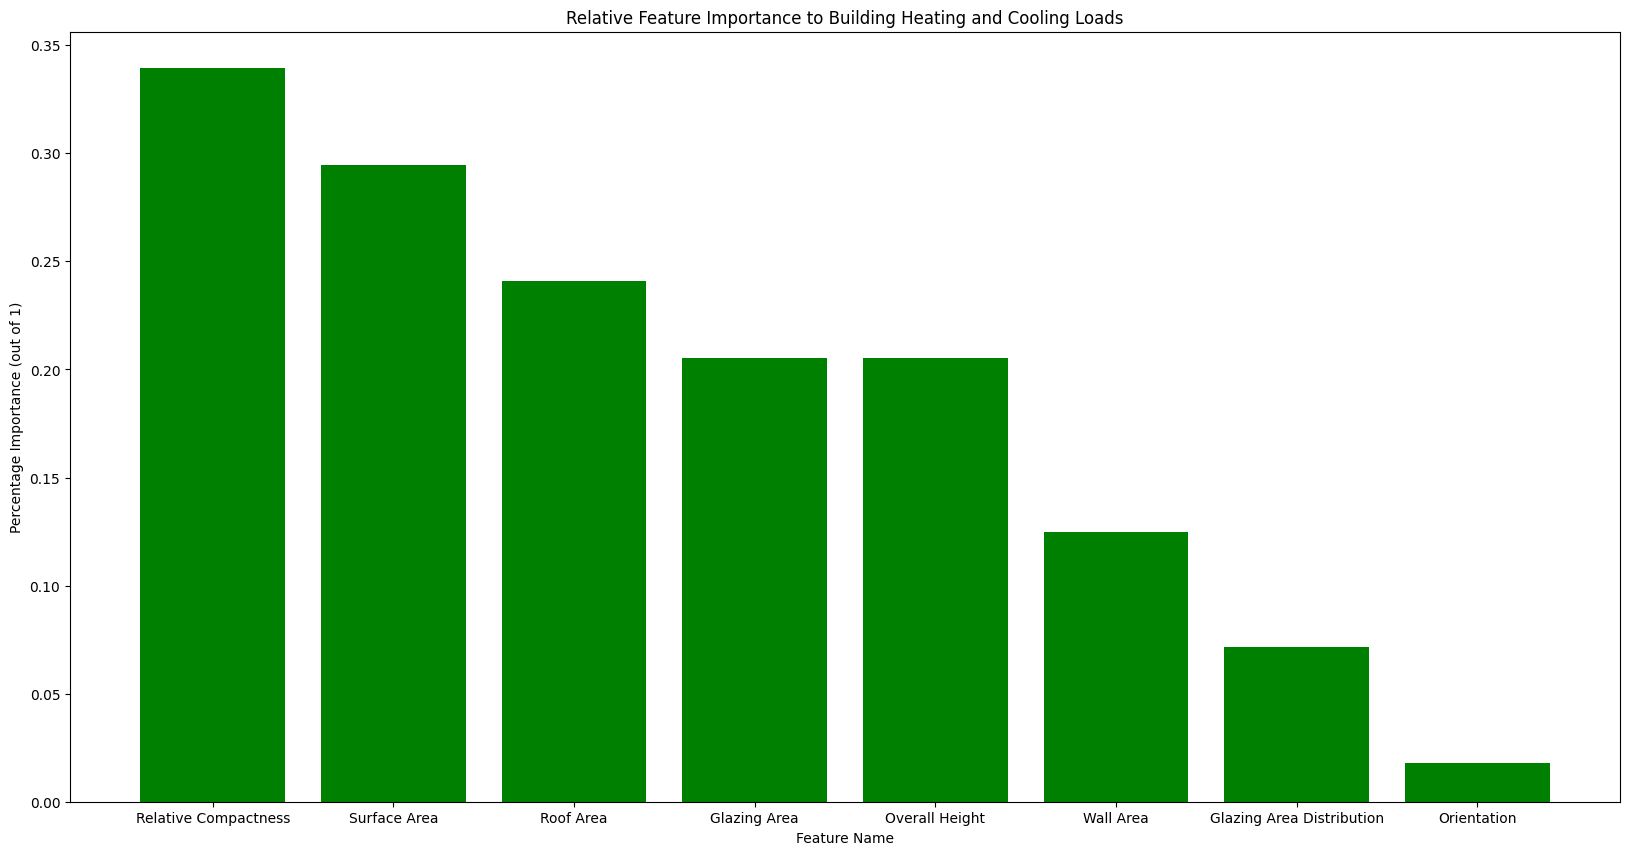

In [32]:
Dict = {'Relative Compactness':38/112, 'Surface Area':33/112, 'Roof Area':27/112,'Glazing Area':23/112,'Overall Height':23/112, 'Wall Area':14/112, 'Glazing Area Distribution':8/112, 'Orientation':2/112}
plt.figure(figsize=(20, 10))
plt.bar(Dict.keys(),Dict.values(), color='g')
plt.title('Relative Feature Importance to Building Heating and Cooling Loads')
plt.ylabel('Percentage Importance (out of 1)')
plt.xlabel('Feature Name')
plt.show()

In [17]:
feat_comp_score = pd.DataFrame()
feat_comp_score['Random Forest'] = df1['Average']
feat_comp_score['RegularGradientBoosting on Heating'] = df5['Average']
feat_comp_score['RegularGradientBoosting on Cooling'] = df6['Average']
feat_comp_score['AdaBoost on Heating'] = df2['Average']
feat_comp_score['AdaBoost on Cooling'] = df3['Average']
feat_comp_score['XGBoost'] = df4['Average']
print('Feature Importance Scores Across of Dataset Across Four Different Regressor Algorithms, Six Different Regression Models')
feat_comp_score

Feature Importance Scores Across of Dataset Across Four Different Regressor Algorithms, Six Different Regression Models


,Random Forest,RegularGradientBoosting on Heating,RegularGradientBoosting on Cooling,AdaBoost on Heating,AdaBoost on Cooling,XGBoost
0,0.259388,0.316170,0.316170,0.277283,0.277283,0.875137
1,0.249057,0.258993,0.258993,0.237258,0.237258,0.055404
2,0.195562,0.171860,0.171860,0.172648,0.172648,0.053369
3,0.167655,0.160812,0.160812,0.112012,0.112012,0.007079
4,0.063145,0.044685,0.044685,0.108610,0.108610,0.004952
5,0.044405,0.031186,0.031186,0.069239,0.069239,0.004052
6,0.014132,0.010437,0.010437,0.022062,0.022062,0.000000
7,0.006656,0.005857,0.005857,0.000889,0.000889,0.000000
